Assorted plots
==============

_22 to 23 July 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

A continuation of `misc-plots-1.ipynb`.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from plots_utils import plot_averaged_training_charts, plot_evaluation_vs_clients, show_start_times

# Running for longer and with smaller $B$

Possibly a little ambitious, but here we go. These were on commit `28770a4`, before the refactor to add the dynamic power scaling scheme, so it'll be good to check whether the runs on `b3b4f07` (which use the same arguments) behave the same.

The value of $B$ chosen is just $\sqrt{0.00025}$, the square root of the power that appeared to be transmitted in the plots for commit `1b5e659` above.

In [2]:
results_dir = Path("../results-downloaded/20210721-smaller-pr/")
show_start_times(results_dir)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **21 Jul 2021, 19:33:35** | 21 Jul 2021, 19:47:44 | 14 min 08 s |
| last to finish | 21 Jul 2021, 23:47:50 | **22 Jul 2021, 00:02:16** | 14 min 25 s |
| shortest | 21 Jul 2021, 19:34:32 | 21 Jul 2021, 19:48:31 | **13 min 59 s** |
| longest | 21 Jul 2021, 21:28:48 | 21 Jul 2021, 22:05:50 | **37 min 02 s** |


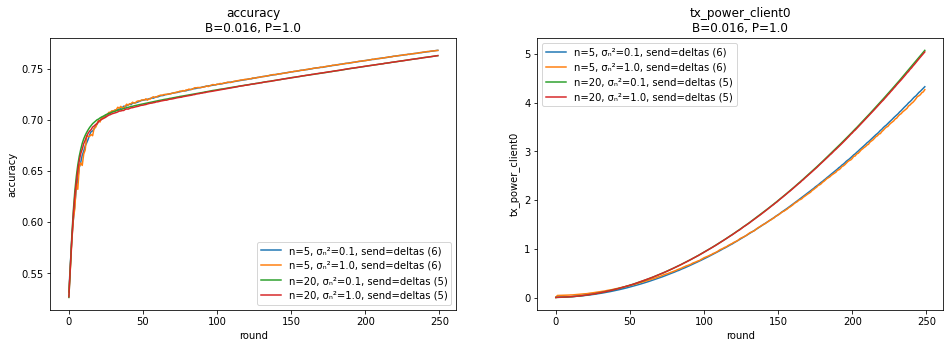

In [3]:
fixed_specs = {
    'rounds': 250,
    'batch_size': 64,
    'lr_client': 0.01,
    'epochs': 1,
    'small': False,
    'data_per_client': 13333,
}
title_specs = {
    'parameter_radius': 0.016,
    'power': 1.0,
}
series_specs = {
    'clients': '__all__',
    'noise': '__all__',
    'send': ['deltas'],
}
fields = ['accuracy', 'tx_power_client0']

plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs);

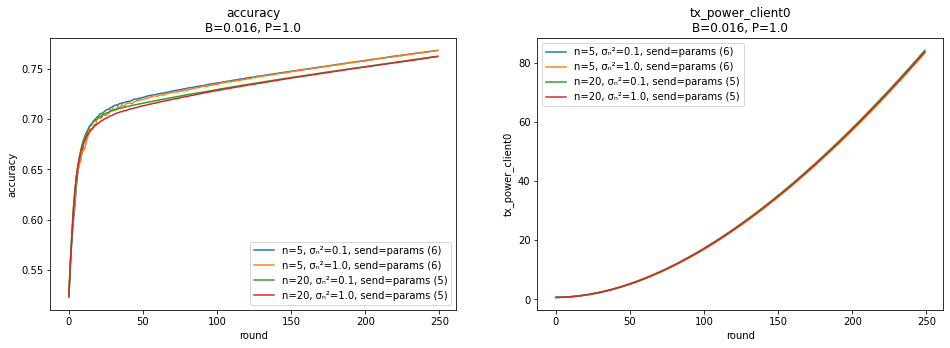

In [4]:
series_specs['send'] = ['params']
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs);

What I predicted about how attempting to scale $B$ by the order of magnitude predicted above would have second-order effects that made the estimate invalid turned out to be correct. We noticed in `ota-basic.ipynb` that the transmit power tends to increase as the model trains, because the model weights increase (from zero) towards their eventual value. So what's happening here is, the model is training faster, which in turn causes it to consume more power—which is why is quite quickly appears to spiral out of control. Recall that in `ota-basic.ipynb`, when we trained it until convergence, we found that the maximum power would imply $B = 3.4$, _i.e._ the power we were using before was _too much_, despite its appearing to be miniscule.

To confirm that this wasn't just my calculation of $B$ being incorrect, here are the same plots, but zoomed into rounds 1–20, which is the same number of rounds we were using before. Notice that the transmit power seems to be around 1.0, as expected:

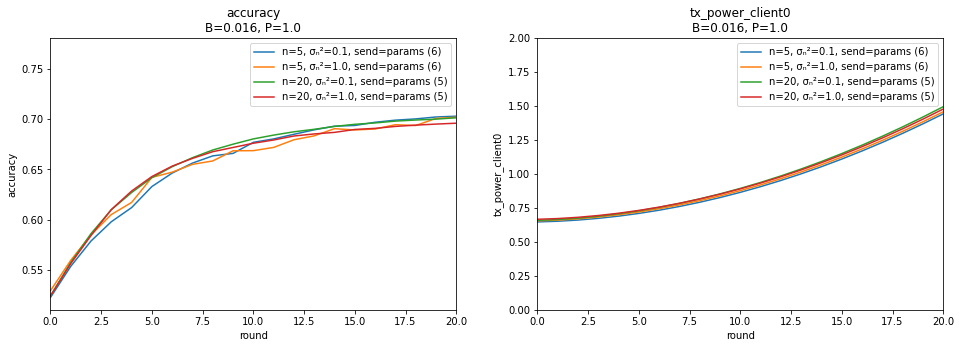

In [5]:
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)
plt.xlim((0, 20))
plt.ylim((0, 2));

To do something satisfying we'll need to control power dynamically, having it react to the current values that clients are attempting to send, if possible.

# The same plots, after the refactor

(hopefully)

These are on commit `b3b4f07`.

In [6]:
results_dir = Path("../results-downloaded/20210722-smaller-pr/")
show_start_times(results_dir)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **22 Jul 2021, 00:19:36** | 22 Jul 2021, 00:38:41 | 19 min 04 s |
| last to finish | 22 Jul 2021, 05:28:30 | **22 Jul 2021, 05:55:53** | 27 min 23 s |
| shortest | 22 Jul 2021, 00:19:37 | 22 Jul 2021, 00:38:37 | **19 min 00 s** |
| longest | 22 Jul 2021, 03:03:38 | 22 Jul 2021, 04:02:07 | **58 min 29 s** |


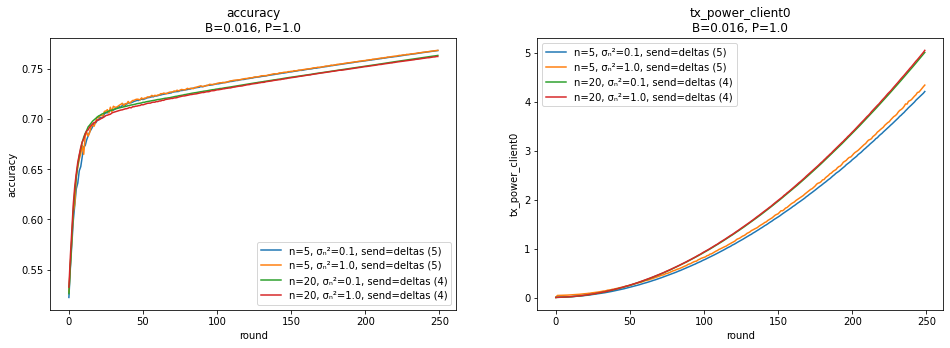

In [7]:
series_specs = {
    'clients': '__all__',
    'noise': '__all__',
    'send': ['deltas'],
}

plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs);

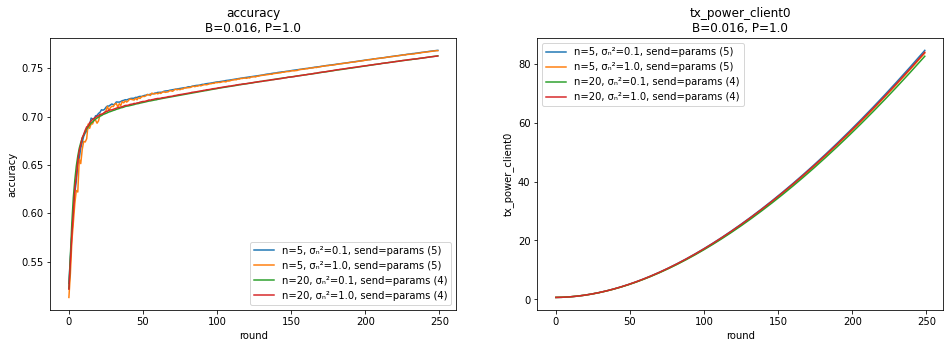

In [8]:
series_specs['send'] = ['params']
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs);

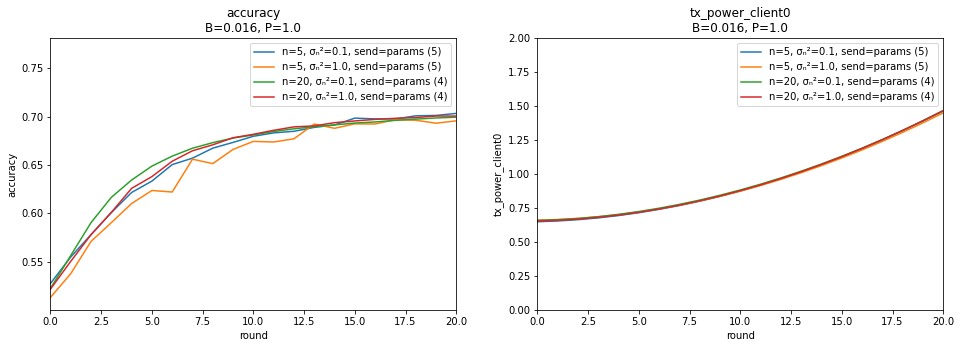

In [9]:
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)
plt.xlim((0, 20))
plt.ylim((0, 2));

# First dynamic power scaling plots

In [10]:
results_dir = Path("../results-downloaded/20210722-dynpower-1/")
show_start_times(results_dir)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **22 Jul 2021, 00:20:37** | 22 Jul 2021, 00:40:02 | 19 min 24 s |
| last to finish | 22 Jul 2021, 05:37:14 | **22 Jul 2021, 06:05:12** | 27 min 58 s |
| shortest | 22 Jul 2021, 00:20:43 | 22 Jul 2021, 00:40:00 | **19 min 16 s** |
| longest | 22 Jul 2021, 03:11:45 | 22 Jul 2021, 04:10:32 | **58 min 46 s** |


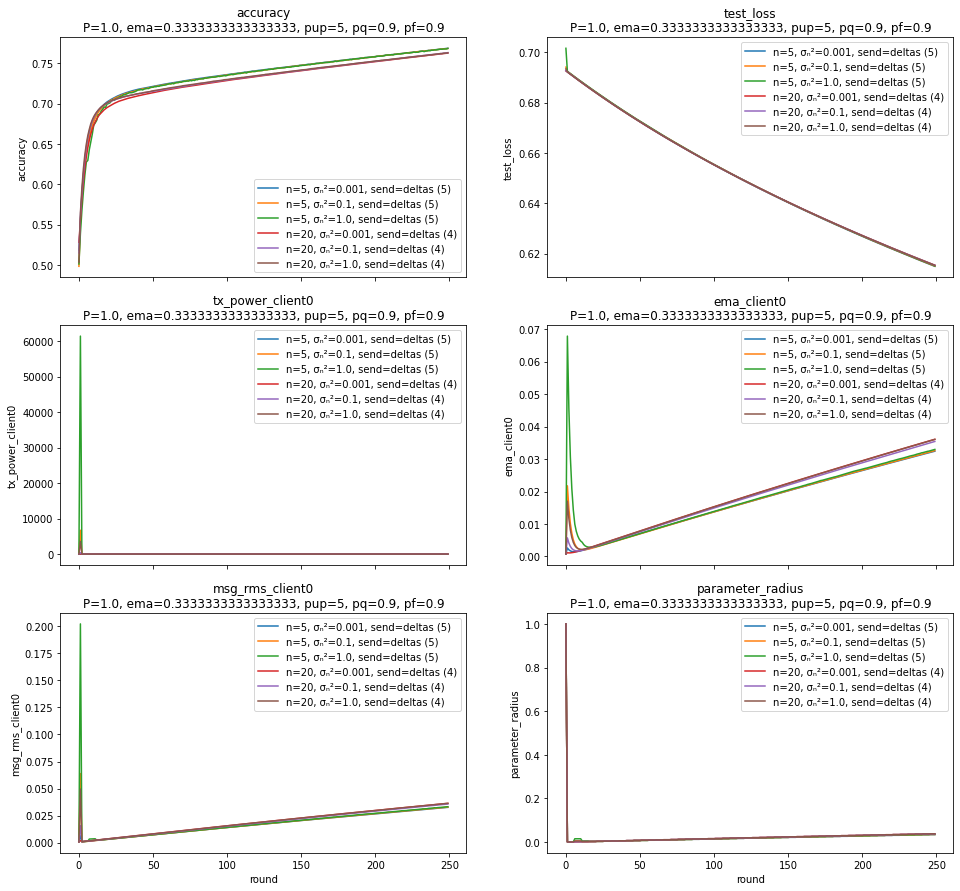

In [11]:
fixed_specs = {
    'rounds': 250,
    'batch_size': 64,
    'lr_client': 0.01,
    'epochs': 1,
    'small': False,
    'data_per_client': 13333,
}
title_specs = {
    'power': 1.0,
    'power_ema_coefficient': 1 / 3,
    'power_update_period': 5,
    'power_quantile': 0.9,
    'power_factor': 0.9,
}
series_specs = {
    'clients': '__all__',
    'noise': '__all__',
    'send': ['deltas'],
}
fields = ['accuracy', 'test_loss', 'tx_power_client0', 'ema_client0', 'msg_rms_client0', 'parameter_radius']

plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs);

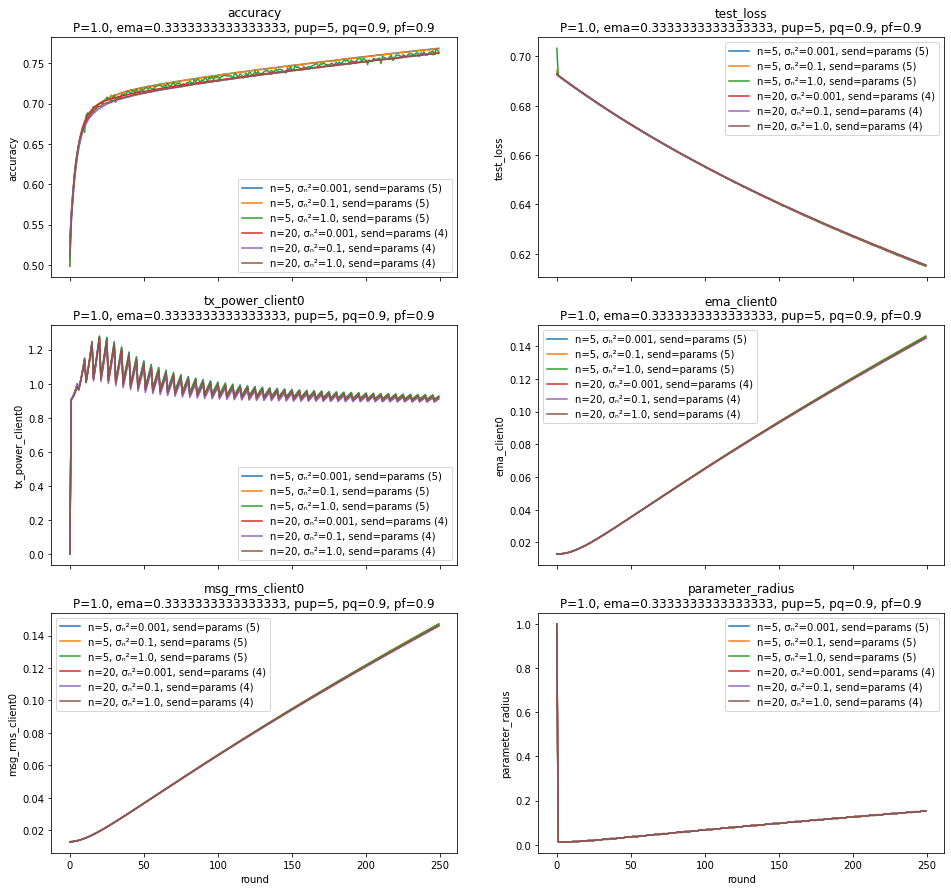

In [12]:
series_specs['send'] = ['params']
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs);

# Longer stochastic quantization plots

From commit `73f80f4`.

In [13]:
results_dir = Path("../results-downloaded/20210722-stocquant-1/")
show_start_times(results_dir)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **22 Jul 2021, 02:12:53** | 22 Jul 2021, 02:40:57 | 28 min 04 s |
| last to finish | 22 Jul 2021, 05:36:50 | **22 Jul 2021, 06:31:26** | 54 min 35 s |
| shortest | 22 Jul 2021, 05:04:43 | 22 Jul 2021, 05:32:24 | **27 min 40 s** |
| longest | 22 Jul 2021, 02:42:06 | 22 Jul 2021, 03:40:54 | **58 min 47 s** |


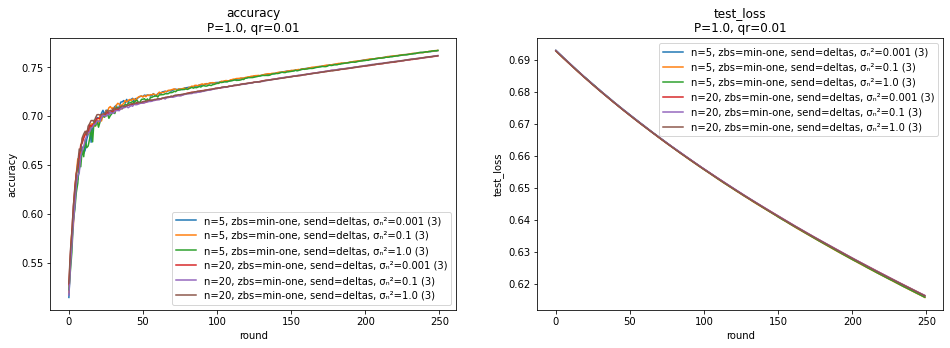

In [14]:
fixed_specs = {
    'rounds': 250,
    'batch_size': 64,
    'lr_client': 0.01,
    'epochs': 1,
    'small': False,
    'data_per_client': 13333,
    'channel_uses': None,
}
title_specs = {
    'power': 1.0,
    'quantization_range': 0.01,
}
series_specs = {
    'clients': '__all__',
    'zero_bits_strategy': '__all__',
    'send': ['deltas'],
    'noise': '__all__',
}
fields = ['accuracy', 'test_loss']

plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs);

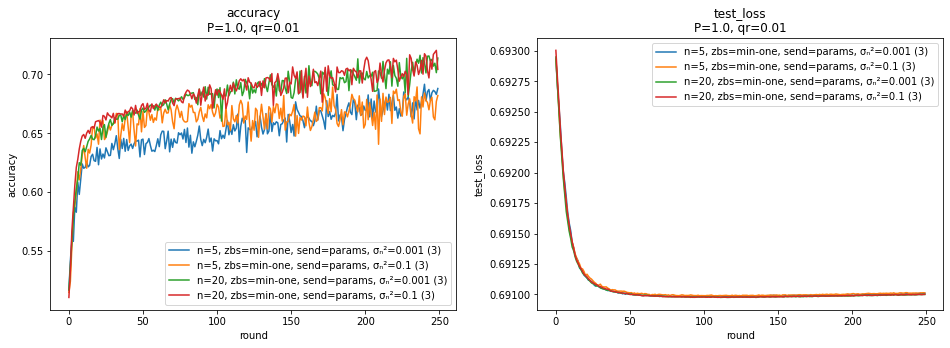

In [15]:
series_specs['send'] = ['params']
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs);

# More stochastic quantization plots

These are from commit `27a0711`, which refactored how the quantization range parameter is passed in.

In [16]:
results_dir = Path("../results-downloaded/20210722-stocquant-2/")
show_start_times(results_dir)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **22 Jul 2021, 06:42:50** | 22 Jul 2021, 06:58:04 | 15 min 13 s |
| last to finish | 22 Jul 2021, 06:59:10 | **22 Jul 2021, 07:38:19** | 39 min 08 s |
| shortest | 22 Jul 2021, 06:42:57 | 22 Jul 2021, 06:58:11 | **15 min 13 s** |
| longest | 22 Jul 2021, 06:58:11 | 22 Jul 2021, 07:38:15 | **40 min 03 s** |


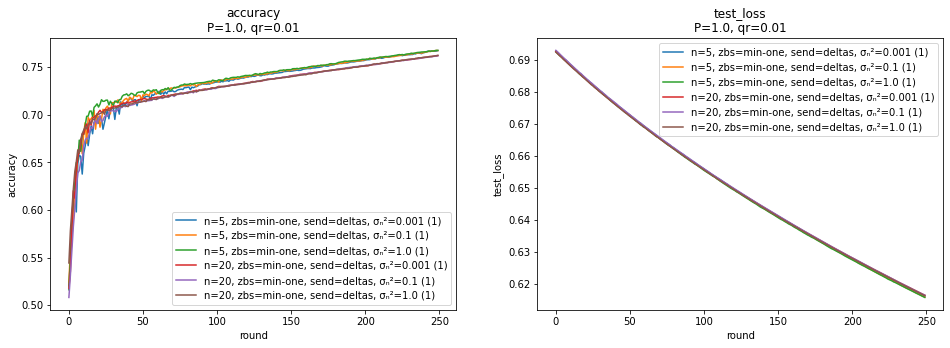

In [17]:
title_specs = {
    'power': 1.0,
    'quantization_range': 0.01,
}
series_specs = {
    'clients': '__all__',
    'zero_bits_strategy': '__all__',
    'send': ['deltas'],
    'noise': '__all__',
}
fields = ['accuracy', 'test_loss']

plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs);

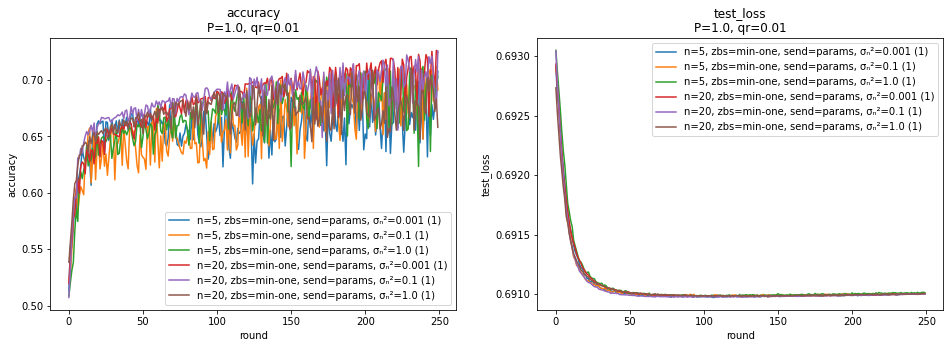

In [18]:
series_specs['send'] = ['params']
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs);